In [1]:
# !pip install xgboost

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics, ensemble, preprocessing, impute, linear_model, pipeline, compose, naive_bayes, tree, svm, feature_selection, neighbors
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import itertools
import os
sns.set_style('whitegrid')

#from sklearn.cross_validation import train_test_split
# from library.sb_utils import save_file
# import geojson
# import geopandas as gpd

In [3]:
listings = pd.read_csv('listings.csv')
neighbourhoods = pd.read_csv('neighbourhoods.csv')
# neighbourhoodsgeojson = geopandas.read_file("neighbourhoods.geojson")

In [4]:
calendar = pd.read_csv('calendar.csv')

In [5]:
reviews = pd.read_csv('reviews.csv')

In [6]:
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,City of Los Angeles,Adams-Normandie
1,City of Los Angeles,Arleta
2,City of Los Angeles,Arlington Heights
3,City of Los Angeles,Atwater Village
4,City of Los Angeles,Baldwin Hills/Crenshaw


In [7]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  270 non-null    object
 1   neighbourhood        270 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [8]:
neighbourhoods.describe()

,neighbourhood_group,neighbourhood
count,270,270
unique,3,270
top,City of Los Angeles,Rolling Hills
freq,114,1


In [9]:
neighbourhoods = neighbourhoods.rename(columns={"neighbourhood":"host_neighbourhood"})
neighbourhoods.head()

,neighbourhood_group,host_neighbourhood
0,City of Los Angeles,Adams-Normandie
1,City of Los Angeles,Arleta
2,City of Los Angeles,Arlington Heights
3,City of Los Angeles,Atwater Village
4,City of Los Angeles,Baldwin Hills/Crenshaw


In [10]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069848 entries, 0 to 1069847
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1069848 non-null  int64 
 1   id             1069848 non-null  int64 
 2   date           1069848 non-null  object
 3   reviewer_id    1069848 non-null  int64 
 4   reviewer_name  1069844 non-null  object
 5   comments       1068844 non-null  object
dtypes: int64(3), object(3)
memory usage: 49.0+ MB


In [12]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20210207181900,2021-02-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210207181900,2021-02-09,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,Run Runyon Canyon<br /><br />Beautifully Furni...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,10.0,10.0,10.0,NaN,t,2,0,2,0,0.34
2,2732,https://www.airbnb.com/rooms/2732,20210207181900,2021-02-09,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,9.0,10.0,9.0,228269,f,2,1,1,0,0.18
3,2864,https://www.airbnb.com/rooms/2864,20210207181900,2021-02-09,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,5728,https://www.airbnb.com/rooms/5728,20210207181900,2021-02-10,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/7a29d275-f293...,9171,https://www.airbnb.com/users/show/9171,...,10.0,10.0,9.0,NaN,f,4,1,3,0,2.20


In [13]:
listings.index.names = ['listing_id']

In [14]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
listing_id,,,,,,,,,,,,,,,,,,,,,
0,109,https://www.airbnb.com/rooms/109,20210207181900,2021-02-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210207181900,2021-02-09,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,Run Runyon Canyon<br /><br />Beautifully Furni...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,10.0,10.0,10.0,NaN,t,2,0,2,0,0.34
2,2732,https://www.airbnb.com/rooms/2732,20210207181900,2021-02-09,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,9.0,10.0,9.0,228269,f,2,1,1,0,0.18
3,2864,https://www.airbnb.com/rooms/2864,20210207181900,2021-02-09,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,5728,https://www.airbnb.com/rooms/5728,20210207181900,2021-02-10,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/7a29d275-f293...,9171,https://www.airbnb.com/users/show/9171,...,10.0,10.0,9.0,NaN,f,4,1,3,0,2.20


In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31900 non-null  int64  
 1   listing_url                                   31900 non-null  object 
 2   scrape_id                                     31900 non-null  int64  
 3   last_scraped                                  31900 non-null  object 
 4   name                                          31899 non-null  object 
 5   description                                   30751 non-null  object 
 6   neighborhood_overview                         20185 non-null  object 
 7   picture_url                                   31900 non-null  object 
 8   host_id                                       31900 non-null  int64  
 9   host_url                                      31900 non-null 

In [16]:
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['host_response_rate'] = listings.host_response_rate.str.replace('%','')
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'])
listings['host_acceptance_rate'] = listings.host_acceptance_rate.str.replace('%','')
listings['host_acceptance_rate'] = pd.to_numeric(listings['host_acceptance_rate'])
listings['price'] = listings.price.str.replace('$','')
listings['price'] = listings.price.str.replace(',','')
listings['price'] = pd.to_numeric(listings['price'])
listings['calendar_last_scraped'] = pd.to_datetime(listings['calendar_last_scraped'])
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])

In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            31900 non-null  int64         
 1   listing_url                                   31900 non-null  object        
 2   scrape_id                                     31900 non-null  int64         
 3   last_scraped                                  31900 non-null  datetime64[ns]
 4   name                                          31899 non-null  object        
 5   description                                   30751 non-null  object        
 6   neighborhood_overview                         20185 non-null  object        
 7   picture_url                                   31900 non-null  object        
 8   host_id                                       31900 non-null  int6

In [18]:
listings.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.190000e+04,3.190000e+04,3.190000e+04,22364.000000,24388.000000,31865.000000,31865.000000,31900.000000,31900.000000,31900.000000,...,23687.000000,23677.000000,23684.000000,23674.000000,23671.000000,31900.000000,31900.000000,31900.000000,31900.000000,24219.000000
mean,2.830624e+07,2.021021e+13,1.085278e+08,92.554776,83.921478,35.820995,35.820995,34.046506,-118.318454,3.551661,...,9.431291,9.757824,9.729860,9.702839,9.421064,9.782445,7.992132,1.193918,0.522132,1.344370
std,1.455240e+07,1.871123e+00,1.117538e+08,19.988956,25.316913,264.122250,264.122250,0.133958,0.166482,2.532326,...,1.028389,0.808370,0.859894,0.783399,0.995772,26.471126,26.284079,2.835415,4.327973,1.600823
min,1.090000e+02,2.021021e+13,5.210000e+02,0.000000,0.000000,0.000000,0.000000,33.338650,-118.934830,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.647765e+07,2.021021e+13,1.625352e+07,97.000000,80.000000,1.000000,1.000000,33.996188,-118.422973,2.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.220000
50%,2.982978e+07,2.021021e+13,6.298470e+07,100.000000,96.000000,2.000000,2.000000,34.059365,-118.343930,3.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.740000
75%,4.199242e+07,2.021021e+13,1.751283e+08,100.000000,100.000000,6.000000,6.000000,34.103383,-118.251797,4.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,3.000000,1.000000,0.000000,1.950000
max,4.807232e+07,2.021021e+13,3.875688e+08,100.000000,100.000000,7421.000000,7421.000000,34.811130,-117.654420,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,228.000000,228.000000,23.000000,67.000000,32.360000


In [19]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,85246,2021-02-09,t,$95.00,$95.00,30.0,190.0
1,109,2021-02-09,f,$115.00,$115.00,30.0,730.0
2,109,2021-02-10,f,$115.00,$115.00,30.0,730.0
3,109,2021-02-11,f,$115.00,$115.00,30.0,730.0
4,109,2021-02-12,f,$115.00,$115.00,30.0,730.0


In [20]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11643526 entries, 0 to 11643525
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 621.8+ MB


In [21]:
calendar['price'] = calendar.price.str.replace('$','')
calendar['price'] = calendar.price.str.replace(',','')
calendar['adjusted_price'] = calendar.adjusted_price.str.replace('$','')
calendar['adjusted_price'] = calendar.adjusted_price.str.replace(',','')
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = pd.to_numeric(calendar['price'])
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'])

In [22]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,85246,2021-02-09,t,95.0,95.0,30.0,190.0
1,109,2021-02-09,f,115.0,115.0,30.0,730.0
2,109,2021-02-10,f,115.0,115.0,30.0,730.0
3,109,2021-02-11,f,115.0,115.0,30.0,730.0
4,109,2021-02-12,f,115.0,115.0,30.0,730.0


In [23]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11643526 entries, 0 to 11643525
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 621.8+ MB


In [24]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,1.164353e+07,1.164299e+07,1.164299e+07,1.164243e+07,1.164243e+07
mean,2.830550e+07,2.347715e+02,2.345563e+02,2.428316e+01,1.009238e+06
std,1.455232e+07,6.255005e+02,6.245131e+02,6.797127e+01,4.652437e+07
min,1.090000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.647722e+07,7.100000e+01,7.100000e+01,2.000000e+00,3.650000e+02
50%,2.982909e+07,1.150000e+02,1.150000e+02,3.000000e+01,1.125000e+03
75%,4.199242e+07,1.990000e+02,1.990000e+02,3.000000e+01,1.125000e+03
max,4.807232e+07,2.105300e+04,2.105300e+04,1.199000e+03,2.147484e+09


In [25]:
airbnb = calendar.merge(listings, how='left', on='listing_id')
airbnb.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id,listing_url,scrape_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,85246,2021-02-09,t,95.0,95.0,30.0,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109,2021-02-09,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87
2,109,2021-02-10,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87
3,109,2021-02-11,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87
4,109,2021-02-12,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87


In [26]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11643526 entries, 0 to 11643525
Data columns (total 81 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   listing_id                                    int64         
 1   date                                          datetime64[ns]
 2   available                                     object        
 3   price_x                                       float64       
 4   adjusted_price                                float64       
 5   minimum_nights_x                              float64       
 6   maximum_nights_x                              float64       
 7   id                                            float64       
 8   listing_url                                   object        
 9   scrape_id                                     float64       
 10  last_scraped                                  datetime64[ns]
 11  name                  

In [27]:
# airbnb = reviews.merge(airbnb, how='left', on='listing_id')
airbnb.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id,listing_url,scrape_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,85246,2021-02-09,t,95.0,95.0,30.0,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109,2021-02-09,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87
2,109,2021-02-10,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87
3,109,2021-02-11,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87
4,109,2021-02-12,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,8.0,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87


In [28]:
# airbnb.info()

In [29]:
airbnb = airbnb.merge(neighbourhoods, how='left', on='host_neighbourhood')
airbnb.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id,listing_url,scrape_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_group
0,85246,2021-02-09,t,95.0,95.0,30.0,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109,2021-02-09,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles
2,109,2021-02-10,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles
3,109,2021-02-11,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles
4,109,2021-02-12,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles


In [30]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11643526 entries, 0 to 11643525
Data columns (total 82 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   listing_id                                    int64         
 1   date                                          datetime64[ns]
 2   available                                     object        
 3   price_x                                       float64       
 4   adjusted_price                                float64       
 5   minimum_nights_x                              float64       
 6   maximum_nights_x                              float64       
 7   id                                            float64       
 8   listing_url                                   object        
 9   scrape_id                                     float64       
 10  last_scraped                                  datetime64[ns]
 11  name                  

In [31]:
# missing = pd.concat([airbnb.sum().isnull(), 100 * airbnb.mean().isnull()], axis=1)
# missing.columns=['count', '%']
# missing.sort_values(by='count')

In [32]:
airbnb.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id,listing_url,scrape_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_group
0,85246,2021-02-09,t,95.0,95.0,30.0,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109,2021-02-09,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles
2,109,2021-02-10,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles
3,109,2021-02-11,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles
4,109,2021-02-12,f,115.0,115.0,30.0,730.0,95242.0,https://www.airbnb.com/rooms/95242,2.021021e+13,...,10.0,8.0,NaN,f,6.0,6.0,0.0,0.0,0.87,City of Los Angeles


In [33]:
airbnb.columns

Index(['listing_id', 'date', 'available', 'price_x', 'adjusted_price',
       'minimum_nights_x', 'maximum_nights_x', 'id', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price_y',
       'minimum_nights_y', 'maximum_nights_y', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimu

In [34]:
airbnb.select_dtypes('object')

,available,listing_url,name,description,neighborhood_overview,picture_url,host_url,host_name,host_location,host_about,...,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,license,instant_bookable,neighbourhood_group
0,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f,https://www.airbnb.com/rooms/95242,Private Apt. in Heart of City! S.B,<b>The space</b><br />Hello and welcome to thi...,NaN,https://a0.muscache.com/pictures/6627140/c27da...,https://www.airbnb.com/users/show/465624,Angie,"Los Angeles, California, United States","Hi I am angie, a married mother of four. I l...",...,Fairfax,City of Los Angeles,Entire apartment,Entire home/apt,1 bath,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Coffee ma...",t,NaN,f,City of Los Angeles
2,f,https://www.airbnb.com/rooms/95242,Private Apt. in Heart of City! S.B,<b>The space</b><br />Hello and welcome to thi...,NaN,https://a0.muscache.com/pictures/6627140/c27da...,https://www.airbnb.com/users/show/465624,Angie,"Los Angeles, California, United States","Hi I am angie, a married mother of four. I l...",...,Fairfax,City of Los Angeles,Entire apartment,Entire home/apt,1 bath,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Coffee ma...",t,NaN,f,City of Los Angeles
3,f,https://www.airbnb.com/rooms/95242,Private Apt. in Heart of City! S.B,<b>The space</b><br />Hello and welcome to thi...,NaN,https://a0.muscache.com/pictures/6627140/c27da...,https://www.airbnb.com/users/show/465624,Angie,"Los Angeles, California, United States","Hi I am angie, a married mother of four. I l...",...,Fairfax,City of Los Angeles,Entire apartment,Entire home/apt,1 bath,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Coffee ma...",t,NaN,f,City of Los Angeles
4,f,https://www.airbnb.com/rooms/95242,Private Apt. in Heart of City! S.B,<b>The space</b><br />Hello and welcome to thi...,NaN,https://a0.muscache.com/pictures/6627140/c27da...,https://www.airbnb.com/users/show/465624,Angie,"Los Angeles, California, United States","Hi I am angie, a married mother of four. I l...",...,Fairfax,City of Los Angeles,Entire apartment,Entire home/apt,1 bath,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Coffee ma...",t,NaN,f,City of Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643521,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11643522,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11643523,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11643524,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
airbnb['name'].value_counts()

Cozy room with private entrance and full bathroom                       366
Two or One BDR:  Venice Walk Street neighborhood                        365
Spacious Bedroom in Central LA                                          365
MODERN VILLA                                                            365
Furnished King Bedroom near DTLA - private room                         365
Dtla near redline                                                       365
Palms Paradise +Pool                                                    365
Private Apt. in Heart of City!  S.B                                     365
Stunning 1 Bedroom in Westwood #413                                     365
Backyard urban homestead in Tujunga                                     365
Very Clean Room in Safe and Great Location                              365
1 bedroom Private Space Get Away LA                                     365
Long Beach/Signal Hill - Private Room #1                                365
Stunning Wes

In [ ]:
sns.pairplot(airbnb)

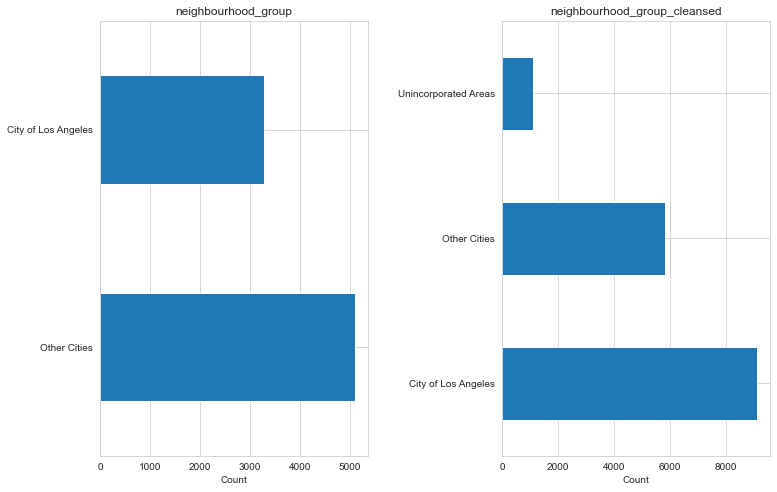

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.neighbourhood_group.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('neighbourhood_group')
ax[0].set_xlabel('Count')
airbnb.neighbourhood_group_cleansed.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('neighbourhood_group_cleansed')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

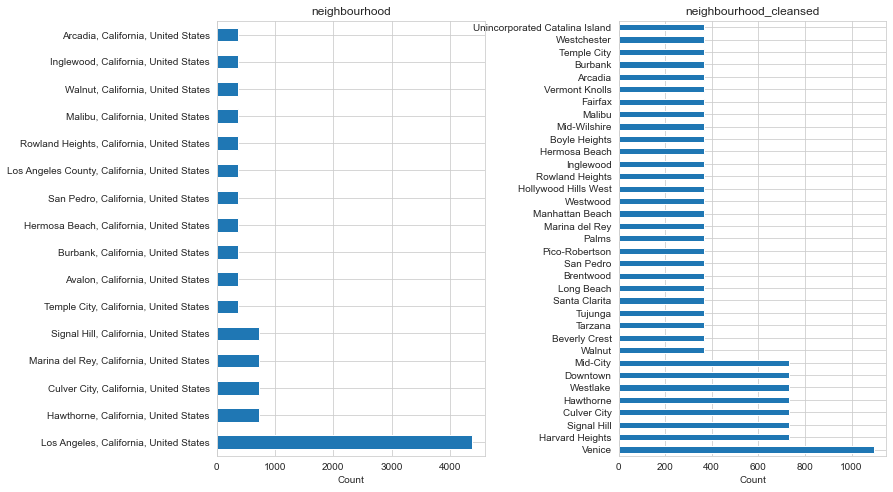

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.neighbourhood.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('neighbourhood')
ax[0].set_xlabel('Count')
airbnb.neighbourhood_cleansed.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('neighbourhood_cleansed')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

array([[<AxesSubplot:title={'center':'price_x'}>]], dtype=object)

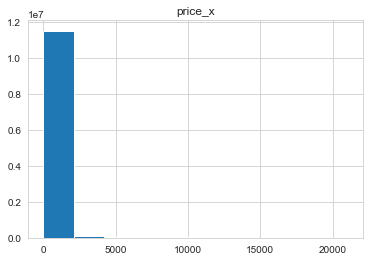

In [39]:
airbnb.hist(['price_x'])

<AxesSubplot:xlabel='price_x'>

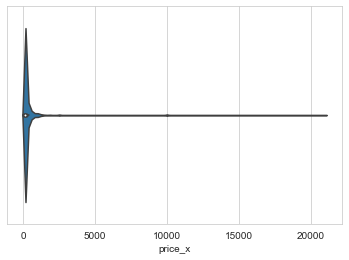

In [40]:
sns.violinplot(x='price_x', data=airbnb)

array([[<AxesSubplot:title={'center':'adjusted_price'}>]], dtype=object)

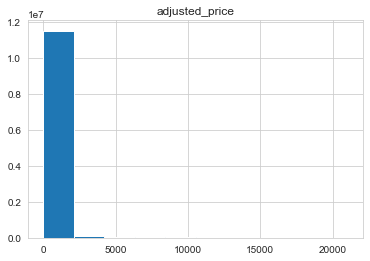

In [41]:
airbnb.hist(['adjusted_price'])

<AxesSubplot:xlabel='adjusted_price'>

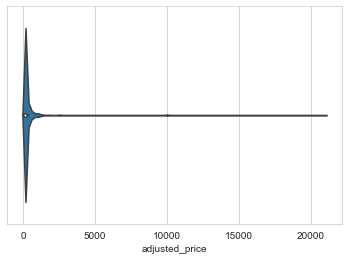

In [42]:
sns.violinplot(x='adjusted_price', data=airbnb)

array([[<AxesSubplot:title={'center':'price_y'}>]], dtype=object)

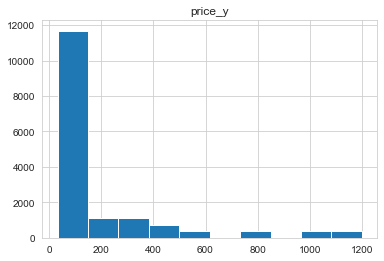

In [43]:
airbnb.hist(['price_y'])

<AxesSubplot:xlabel='price_y'>

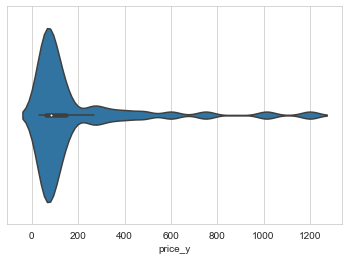

In [44]:
sns.violinplot(x='price_y', data=airbnb)

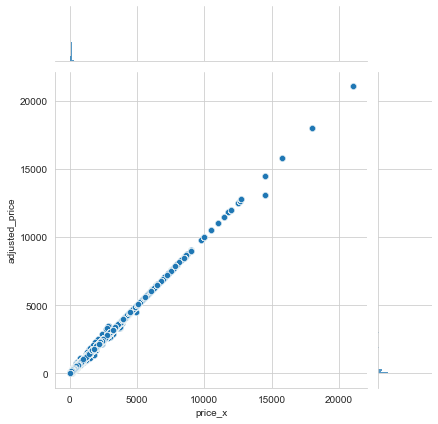

In [45]:
sns.jointplot(x='price_x', y='adjusted_price', data=airbnb)

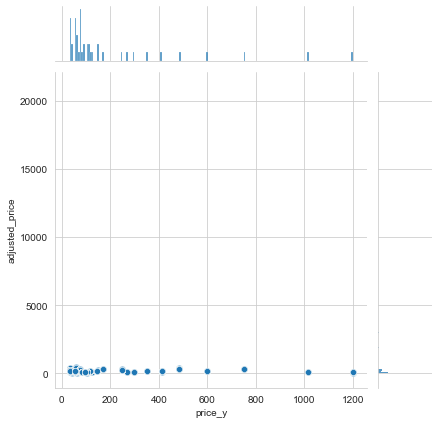

In [47]:
sns.jointplot(x='price_y', y='adjusted_price', data=airbnb)

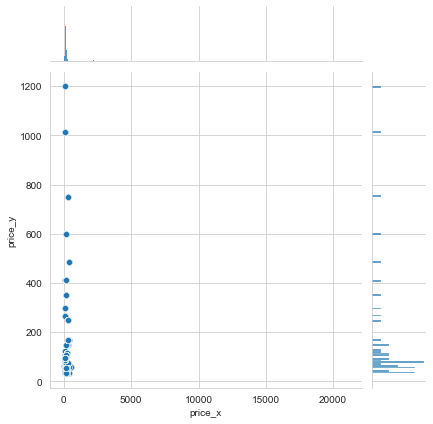

In [48]:
sns.jointplot(x='price_x', y='price_y', data=airbnb)

In [ ]:
sns.jointplot(x='price_x', y='adjusted_price', data=airbnb, kind='kde')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.price_y.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('price_y')
ax[0].set_xlabel('Count')
#airbnb.adjusted_price.value_counts().plot(kind='barh', ax=ax[1])
#ax[1].set_title('adjusted_price')
#ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.instant_bookable.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('instant_bookable')
ax[0].set_xlabel('Count')
airbnb.host_response_time.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('host_response_time')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
# 0   date                                          datetime64[ns]
# 8   last_scraped                                  datetime64[ns]
# 16  host_since                                    datetime64[ns]                            

In [ ]:
airbnb.hist(['minimum_nights_x'])

In [ ]:
airbnb.hist(['maximum_nights_x'])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.minimum_nights_y.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('minimum_nights_y')
ax[0].set_xlabel('Count')
airbnb.maximum_nights_y.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('maximum_nights_y')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.minimum_minimum_nights.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('minimum_minimum_nights')
ax[0].set_xlabel('Count')
airbnb.maximum_minimum_nights.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('maximum_minimum_nights')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.minimum_maximum_nights.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('minimum_maximum_nights')
ax[0].set_xlabel('Count')
airbnb.maximum_maximum_nights.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('maximum_maximum_nights')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.minimum_nights_avg_ntm.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('minimum_nights_avg_ntm')
ax[0].set_xlabel('Count')
airbnb.maximum_nights_avg_ntm.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('maximum_nights_avg_ntm')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.property_type.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('property_type')
ax[0].set_xlabel('Count')
airbnb.room_type.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('room_type')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.bedrooms.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('bedrooms')
ax[0].set_xlabel('Count')
airbnb.beds.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('beds')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
#airbnb.bathrooms.value_counts().plot(kind='barh', ax=ax[0])
#ax[0].set_title('bathrooms')
#ax[0].set_xlabel('Count')
airbnb.bathrooms_text.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('bathrooms_text')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);
#available
#bathrooms_text

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.has_availability.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('has_availability')
ax[0].set_xlabel('Count')
airbnb.instant_bookable.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('instant_bookable')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);
#available

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.license.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('license')
ax[0].set_xlabel('Count')
airbnb.review_scores_rating.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('review_scores_rating')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.review_scores_accuracy.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('review_scores_accuracy')
ax[0].set_xlabel('Count')
airbnb.review_scores_cleanliness.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('review_scores_cleanliness')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.review_scores_checkin.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('review_scores_checkin')
ax[0].set_xlabel('Count')
airbnb.review_scores_communication.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('review_scores_communication')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.review_scores_location.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('review_scores_location')
ax[0].set_xlabel('Count')
airbnb.review_scores_value.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('review_scores_value')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.calculated_host_listings_count.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('calculated_host_listings_count')
ax[0].set_xlabel('Count')
airbnb.calculated_host_listings_count_entire_homes.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('calculated_host_listings_count_entire_homes')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.calculated_host_listings_count_private_rooms.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('calculated_host_listings_count_private_rooms')
ax[0].set_xlabel('Count')
airbnb.calculated_host_listings_count_shared_rooms.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('calculated_host_listings_count_shared_rooms')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.number_of_reviews.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('number_of_reviews')
ax[0].set_xlabel('Count')
airbnb.reviews_per_month.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('reviews_per_month')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.number_of_reviews_ltm.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('number_of_reviews_ltm')
ax[0].set_xlabel('Count')
airbnb.number_of_reviews_l30d.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('number_of_reviews_l30d')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.availability_30.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('availability_30')
ax[0].set_xlabel('Count')
airbnb.availability_60.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('availability_60')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.availability_90.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('availability_90')
ax[0].set_xlabel('Count')
airbnb.availability_365.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('availability_365')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
airbnb.hist(['accommodates'])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.amenities.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('amenities')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
airbnb.hist(['amenities'])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.host_identity_verified.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('host_identity_verified')
ax[0].set_xlabel('Count')
airbnb.host_has_profile_pic.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('host_has_profile_pic')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.host_verifications.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('host_verifications')
ax[0].set_xlabel('Count')
airbnb.host_is_superhost.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('host_is_superhost')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.host_location.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('host_location')
ax[0].set_xlabel('Count')
airbnb.host_neighbourhood.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('host_neighbourhood')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.host_response_rate.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('host_response_rate')
ax[0].set_xlabel('Count')
airbnb.host_acceptance_rate.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('host_acceptance_rate')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.host_listings_count.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('host_listings_count')
ax[0].set_xlabel('Count')
airbnb.host_total_listings_count.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('host_total_listings_count')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb.host_response_time.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('host_response_time')
ax[0].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [ ]:
price_means = airbnb.groupby('neighbourhood_group')[['price_x', 'adjusted_price', 'price_y']].mean()
price_means

plt.figure(figsize=(24,13.5))
sns.kdeplot(data=train['price_x'])
plt.show()

plt.figure(figsize=(24,13.5))
sns.boxplot(data=train, orient='h', x='price_x')
plt.show()

plt.figure(figsize=(24,13.5))
sns.histplot(data=train['Age'])
plt.show()

In [ ]:


plt.figure(figsize=(24,13.5))
sns.kdeplot(data=train['Fare'])
plt.show()

plt.figure(figsize=(24,13.5))
sns.boxplot(data=train, x='Fare')
plt.show()

In [ ]:
plt.figure(figsize=(24,13.5))
sns.barplot(data=train, x='SibSp', y='Survived')
plt.show()

In [ ]:
plt.figure(figsize=(24,13.5))
sns.barplot(data=train, x='Parch', y='Survived')
plt.show()

In [ ]:
train.groupby('Parch').mean()

In [ ]:
train.loc[:, 'Parch'].value_counts()

In [ ]:
train[train['Parch'] == 4]

In [ ]:
train[train['Parch'] == 6]

In [ ]:
for col in categorical:
    plt.figure(figsize=(24,13.5))
    sns.barplot(x=train[col], y=train['Survived'], hue=train['Sex'])
    plt.show()

In [ ]:
for col in numerical:
    plt.figure(figsize=(24,13.5))
    sns.lmplot(data = train, x=col, y='Survived', hue='Sex', logistic=True, scatter=False, height=9, aspect=16/9)
    plt.show()

In [ ]:
for col in categorical:
    plt.figure(figsize=(24,13.5))
    sns.barplot(x=train[col], y=train['Survived'], hue=train['Pclass'])
    plt.show()

In [ ]:
for col in numerical:
    plt.figure(figsize=(24,13.5))
    sns.lmplot(data = train, x=col, y='Survived', hue='Pclass', logistic=True, scatter=False, height=9, aspect=16/9)
    plt.show()

In [ ]:
for col in categorical:
    plt.figure(figsize=(24,13.5))
    sns.barplot(x=train[col], y=train['Survived'], hue=train['Embarked'])
    plt.show()

In [ ]:
for col in numerical:
    plt.figure(figsize=(24,13.5))
    sns.lmplot(data = train, x=col, y='Survived', hue='Embarked', logistic=True, scatter=False, height=9, aspect=16/9)
    plt.show()

In [ ]:
plt.figure(figsize=(24,13.5))
sns.heatmap(data=train.corr(), annot=True)
plt.show()

In [ ]:
X = train.drop(['Cabin', 'Ticket', 'Name', 'Survived'], axis=1)

y = train.Survived

In [ ]:
categorical = [col for col in X.columns if X[col].dtype == 'object' or X[col].nunique() <= 8]

numerical = [col for col in X.columns if col not in categorical]

categorical, numerical

In [ ]:
def encode(X):
    df = X.copy()
    df['Embarked'].replace({
        'C': 3,
        'S': 2,
        'Q': 1
    }, inplace=True)

    df['Sex'].replace({
        'male': 0,
        'female': 1
    }, inplace=True)
    return df

In [ ]:
def points(X):
    df = X.copy()
    LowAge = df.loc[:, 'Age'].quantile(0.25)
    HighAge = df.loc[:, 'Age'].quantile(0.75)
    df.loc[:, 'Family'] = df['Parch']+df['SibSp']
    df.loc[:, 'Wealth Score'] = df['Fare'] / df['Pclass']
    HighWealth = df['Wealth Score'].quantile(0.6)
    for row in df.index:
        tally = 0
        if df.loc[row, 'Pclass'] == 1:
            tally += 2
        elif df.loc[row, 'Pclass'] == 2:
            tally += 1
        else:
            pass

        if df.loc[row, 'Sex'] == 1:
            tally += 1
        else:
            pass

        if df.loc[row, 'Embarked'] == 3:
            tally += 2
        elif df.loc[row, 'Embarked'] == 2:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'SibSp'] in [0, 1, 2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Sex'] == 1 and df.loc[row, 'Parch'] in [0, 1, 2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Sex'] == 1 and df.loc[row, 'Pclass'] == 1:
            tally += 3
        elif df.loc[row, 'Sex'] == 1 and df.loc[row, 'Pclass'] == 2:
            tally += 2
        else:
            pass

        if df.loc[row, 'Sex'] == 1 and (df.loc[row, 'Age'] < LowAge or df.loc[row, 'Age'] > HighAge):
            tally += 3
        elif df.loc[row, 'Age'] < LowAge:
            tally += 1
        else:
            pass

        if df.loc[row, 'Wealth Score'] > HighWealth:
            tally += 1
        else:
            pass

        if df.loc[row, 'Embarked'] == 3 and df.loc[row, 'Parch'] in [0,1,2]:
            tally += 2
        elif df.loc[row, 'Embarked'] == 2 and df.loc[row, 'Parch'] in [1,3]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Embarked'] == 1 and df.loc[row, 'Parch'] == 0:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Embarked'] == 2 and df.loc[row, 'SibSp'] in [0,1]:
            tally += 1
        elif df.loc[row, 'Embarked'] in [1, 3] and df.loc[row, 'SibSp'] in [0,1,2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 1 and df.loc[row, 'SibSp'] in [0,1,2]:
            tally += 2
        elif df.loc[row, 'Pclass'] == 1 and df.loc[row, 'SibSp'] == 3:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 2 and df.loc[row, 'SibSp'] in [0,1,3]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 3 and df.loc[row, 'SibSp'] in [0,1,2]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 1 and df.loc[row, 'Parch'] in [0,1,2]:
            tally += 2
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 2 and df.loc[row, 'Parch'] in [0, 1, 2, 3]:
            tally += 1
        else:
            pass
        
        if df.loc[row, 'Pclass'] == 3 and df.loc[row, 'Parch'] == 1:
            tally += 1
        else:
            pass

        df.loc[row, 'Point Score'] = tally

    df.loc[:, 'Overall Score'] = df['Point Score'] * df['Wealth Score']
    High_Overall = 1250
    HighPoints = 10
    HighWealth = 200
    
    for row in df.index:
        if df.loc[row, 'Overall Score'] >= 2400:
            df.loc[row, 'High Overall'] = 1
        else:
            df.loc[row, 'High Overall'] = 0
            
        if df.loc[row, 'Point Score'] >= 13:
            df.loc[row, 'High Points'] = 1
        else:
            df.loc[row, 'High Points'] = 0
        
        if df.loc[row, 'Wealth Score'] >= 200:
            df.loc[row, 'High Wealth'] = 1
        else:
            df.loc[row, 'High Wealth'] = 0
        
    return df

In [ ]:
def prep(x):
    df = x.copy()
    df = points(encode(df))
    return df.loc[:, ['Overall Score', 'Point Score', 'Wealth Score', 'High Overall', 'High Points']+categorical+numerical]

In [ ]:
plt.figure(figsize=(24,13.5))
sns.lmplot(data=points(encode(train)), x='Point Score', y='Survived', logistic=True, scatter=False, height=9, aspect=16/9)
plt.show()

In [ ]:
plt.figure(figsize=(24,13.5))
sns.lmplot(data=points(encode(train)), x='Wealth Score', y='Survived', logistic=True, scatter=False, height=9, aspect=16/9)
plt.show()

In [ ]:
plt.figure(figsize=(24,13.5))
sns.lmplot(data=points(encode(train)), x='Overall Score', y='Survived', logistic=True, scatter=False, height=9, aspect=16/9)
plt.show()

In [ ]:
plt.figure(figsize=(24,13.5))
sns.heatmap(data=points(encode(train)).corr(), annot=True)
plt.show()

In [ ]:
full = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalise', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', linear_model.LogisticRegression(C=1, solver='newton-cg', penalty='l2'))
])

In [ ]:
rffull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', ensemble.RandomForestClassifier(n_estimators=1300, min_samples_split=5, min_samples_leaf=4, max_depth=30, max_features='sqrt', bootstrap=False))
])

In [ ]:
gbfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', ensemble.GradientBoostingClassifier(validation_fraction=0.3,
                                                    subsample=1,
                                                    n_iter_no_change=5,
                                                    n_estimators=360,
                                                    min_samples_split=2,
                                                    min_samples_leaf=1,
                                                    max_depth=2,
                                                    learning_rate=0.4))

In [ ]:
adafull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', ensemble.AdaBoostClassifier(linear_model.LogisticRegression(C=1, solver='lbfgs', penalty='l2'), n_estimators=1000, learning_rate=0.05))
])

In [ ]:
bfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', naive_bayes.GaussianNB()),
])

In [ ]:
SVCfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', svm.LinearSVC(C=0.85, penalty='l2', max_iter=4897))
])

In [ ]:
knnfull = pipeline.Pipeline(steps=[
    ('preprocess', preprocessing.FunctionTransformer(prep)),
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', neighbors.KNeighborsClassifier(weights='uniform', n_neighbors=6, algorithm='kd_tree', n_jobs=-1))
])

In [ ]:
for col in numerical:
    X.loc[:, col] = X[col].fillna(X[col].median())
    test.loc[:, col] = test[col].fillna(test[col].median())

X.loc[:, categorical] = X[categorical].fillna(0)
test.loc[:, categorical] = test[categorical].fillna(0)

In [ ]:
logistic = model_selection.cross_val_score(full, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

logacc = model_selection.cross_val_score(full, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [ ]:
randomforest = model_selection.cross_val_score(rffull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

rfacc = model_selection.cross_val_score(rffull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [ ]:
gradient_boost = model_selection.cross_val_score(gbfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

gbacc = model_selection.cross_val_score(gbfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [ ]:
adaboost = model_selection.cross_val_score(adafull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

adaacc = model_selection.cross_val_score(adafull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [ ]:
naiveBayes = model_selection.cross_val_score(bfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

naiveacc = model_selection.cross_val_score(bfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [ ]:
svc = model_selection.cross_val_score(SVCfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

svcacc = model_selection.cross_val_score(SVCfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [ ]:
knn = model_selection.cross_val_score(knnfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)

knnacc = model_selection.cross_val_score(knnfull, X, y, cv=model_selection.StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

In [ ]:
modelscores = pd.DataFrame({
    'Logistic Regression': logistic,
    'Random Forest Classifier': randomforest,
    'Gradient Boosting Classifier': gradient_boost,
    'Adaboost Classifier': adaboost,
    'Naive Bayes Classifier': naiveBayes,
    'Support Vector Classifier': svc,
    'K-Nearest-Neighbors Classifier': knn
})

modelaccuracyscores = pd.DataFrame({
    'Logistic Regression': logacc,
    'Random Forest Classifier': rfacc,
    'Gradient Boosting Classifier': gbacc,
    'Adaboost Classifier': adaacc,
    'Naive Bayes Classifier': naiveacc,
    'Support Vector Classifier': svcacc,
    'K-Nearest-Neighbors Classifier': knnacc
})

plt.figure(figsize=(24,13.5))

sns.barplot(data=modelscores)

plt.show()

In [ ]:
plt.figure(figsize=(24,13.5))

sns.barplot(data=modelaccuracyscores)

plt.show()

In [ ]:
modelscores.mean().sort_values(ascending=False)

In [ ]:
modelaccuracyscores.mean().sort_values(ascending=False)

In [ ]:
rffull.fit(X,y)
full.fit(X, y)
gbfull.fit(X, y)
adafull.fit(X, y)
bfull.fit(X, y)
SVCfull.fit(X, y)
knnfull.fit(X, y)

rfpreds = rffull.predict(test)
lrpreds = full.predict(test)
gbpreds = gbfull.predict(test)
adapreds = adafull.predict(test)
bayespreds = bfull.predict(test)
svcpreds = SVCfull.predict(test)
knnpreds = knnfull.predict(test)

In [ ]:
predsdict = {'random-forest': rfpreds, 'logistic-regression': lrpreds, 'gradient_boosting': gbpreds, 'adaboost': adapreds, 'naive-bayes': bayespreds, 'support-vector': svcpreds, 'k-nearest-neighbors': knnpreds}

In [ ]:
for predictions in predsdict.keys():
    output = pd.DataFrame({
        'PassengerId': test.index,
        'Survived': predsdict[predictions]
    })
    
    output.to_csv('{0}.csv'.format(predictions), index=False)

In [ ]:
# turns my type column into a dummy variable
#dummy = pd.get_dummies(df['Sex'])
#dummy.head()



In [ ]:
#df = pd.concat([df, dummy], axis=1)
#df.head()

In [ ]:
#df = df.merge(dummy, left_index=True, right_index=True)
#df.head()

In [ ]:
# Making a Scaler object
scaler = preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_numerical = scaler.fit_transform(train[numerical])
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

In [ ]:
train.info()

In [ ]:
print(categorical)


In [ ]:
print(numerical)